# Exploratory Analysis & Testing of Model
Notebook for testing and de-bugging the model class from user_knn.py

In [1]:
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import user_knn as uk

## Overview
- [TODO](#todo)
- [Test with toy dataset](#test-with-toy-dataset)
- [Test with music sample](#test-with-music-sample)
- [Analyze full music sample](#analyze-full-music-sample) . 

## TODO 
- ~~fix break in preds for toy data 0,6 (example from )~~ DONE: accidentaly abs on R matrix in wrong place.  
- Why are some columns/rows filled with almost all nans? If only 1 review, it won't work
- create function for train/test split 
- link albums id's to album names

## Test with toy dataset

In [2]:
A = np.array([
    [1, 4, 2, 2],
    [5, 2, 4, 4],
    [0, 0, 3, 0],
    [2, 5, 0, 5],
    [4, 1, 0, 1],
    [0, 2, 5, 0]
])
A = A.astype('float')
A[A == 0] = np.nan
A

array([[ 1.,  4.,  2.,  2.],
       [ 5.,  2.,  4.,  4.],
       [nan, nan,  3., nan],
       [ 2.,  5., nan,  5.],
       [ 4.,  1., nan,  1.],
       [nan,  2.,  5., nan]])

In [3]:
uk_mod = uk.UserKNN(A)

Setup

In [4]:
uk_mod.gen_valid_idx()

In [5]:
uk_mod.valid_idx

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 3),
 (4, 0),
 (4, 1),
 (4, 3),
 (5, 1),
 (5, 2)]

In [6]:
uk_mod.train_test_split()

In [7]:
uk_mod.test_idx

[(0, 2), (0, 1), (3, 1)]

In [8]:
uk_mod.A_prime

array([[ 1., nan, nan,  2.],
       [ 5.,  2.,  4.,  4.],
       [nan, nan,  3., nan],
       [ 2., nan, nan,  5.],
       [ 4.,  1., nan,  1.],
       [nan,  2.,  5., nan]])

In [9]:
uk_mod.gen_M()
uk_mod.gen_mu()

In [10]:
uk_mod.gen_corrcoef()
uk_mod.R.round(2)

array([[ 0.,  1., nan, -0.],
       [ 1.,  0., nan,  1.],
       [nan, nan,  0., nan],
       [-0.,  1., nan,  0.]])

In [11]:
uk_mod.gen_preds()
uk_mod.P.round(3)

/Users/zmeitus/git-hub/music-recommendation/user_knn.py:113: RuntimeWarning: invalid value encountered in divide
  self.P = self.mu + (np.nan_to_num(self.A_prime - J_bar, nan=0) @ R_zeros) / D


array([[ 4.333, -0.333,  2.   ,  5.667],
       [ 3.495,  3.657,  5.5  ,  3.495],
       [ 1.5  ,  0.167,    nan,  1.5  ],
       [ 0.333,  2.333,  4.667,  4.333],
       [ 2.   ,  1.   ,  3.222,  2.   ],
       [ 3.51 ,  3.167,  4.5  ,  3.51 ]])

In [12]:
uk_mod.A

array([[ 1.,  4.,  2.,  2.],
       [ 5.,  2.,  4.,  4.],
       [nan, nan,  3., nan],
       [ 2.,  5., nan,  5.],
       [ 4.,  1., nan,  1.],
       [nan,  2.,  5., nan]])

In [13]:
uk_mod.A_prime

array([[ 1., nan, nan,  2.],
       [ 5.,  2.,  4.,  4.],
       [nan, nan,  3., nan],
       [ 2., nan, nan,  5.],
       [ 4.,  1., nan,  1.],
       [nan,  2.,  5., nan]])

In [14]:
uk_mod.P

array([[ 4.33333333, -0.33333333,  2.        ,  5.66666667],
       [ 3.4950495 ,  3.65671642,  5.5       ,  3.4950495 ],
       [ 1.5       ,  0.16666667,         nan,  1.5       ],
       [ 0.33333333,  2.33333333,  4.66666667,  4.33333333],
       [ 2.        ,  1.        ,  3.22222222,  2.        ],
       [ 3.50990099,  3.16666667,  4.5       ,  3.50990099]])

In [15]:
for t in uk_mod.test_idx:
    i, j = t
    print(f'True value: {uk_mod.A[i,j]}')
    print(f'Pred value: {uk_mod.P[i,j]}')
    print(f'Delta: {abs(uk_mod.A[i,j] - uk_mod.P[i,j])}')

True value: 2.0
Pred value: 2.0
Delta: 0.0
True value: 4.0
Pred value: -0.33333333333333326
Delta: 4.333333333333333
True value: 5.0
Pred value: 2.333333333333333
Delta: 2.666666666666667


In [16]:
uk_mod.A_prime

array([[ 1., nan, nan,  2.],
       [ 5.,  2.,  4.,  4.],
       [nan, nan,  3., nan],
       [ 2., nan, nan,  5.],
       [ 4.,  1., nan,  1.],
       [nan,  2.,  5., nan]])

Get valid 

In [ ]:
valid_i, valid_j = np.where(~np.isnan(user_knn_model.A))
v = list(zip(valid_i, valid_j))
v


## Test with Music Sample

In [ ]:
raw_users = [json.loads(line) for line in open('users.jsonl', 'r')]

In [ ]:
random.seed(37)
sample_frac = 1/10
N = round(len(raw_users) * sample_frac)
idx = random.sample(range(len(raw_users)), N)
raw_users_sample = [raw_users[i] for i in idx]

In [ ]:
n = 600000
p = len(raw_users_sample)

A = np.empty((n, p))
A[:] = np.nan


In [ ]:
raw_users[0].keys()

In [ ]:
col_index = []
pop_cols =[]
row_set = set()
id_ceiling = np.inf
max_id = 0
for j, u in enumerate(raw_users_sample):
    reviews = u['reviews']
    #print(reviews)
    add_rating = False
    for r in reviews:
        id = r['album_id']
        if id < id_ceiling:
            add_rating = True
            row_set.add(id)
            if max_id < int(id):
                max_id = id
            A[id, j] = r['rating']
    if add_rating:
        pop_cols.append(j)
        col_index.append(u['user_id'])
print(max_id)


In [ ]:
len(row_set)

In [ ]:
len(pop_cols)

In [ ]:
p

In [ ]:
np.sum(~np.isnan(A)) / A.size

In [ ]:
np.sum(~np.isnan(A))

In [ ]:
C = A[[i for i in row_set]]

In [ ]:
C

In [ ]:
C = C[:,[j for j in pop_cols]] #

In [ ]:
C.shape

How many have 1 review?

In [ ]:
C_num_alb_rev = np.sum(~np.isnan(C), axis=1)

In [ ]:
np.sum(C_num_alb_rev == 1) / len(C_num_alb_rev)

In [ ]:
np.sum(C_num_alb_rev < 2) / len(C_num_alb_rev)

In [ ]:
np.sum(~np.isnan(C))

In [ ]:
music_mod = uk.UserKNN(C)

In [ ]:
music_mod.gen_corrcoef()

Test gen_corrcoef()

In [ ]:
music_mod.R

In [ ]:
x = np.ma.masked_invalid(music_mod.A[:, 1])
y = np.ma.masked_invalid(music_mod.A[:, 2])
np.ma.corrcoef(x, y, rowvar=False)

In [ ]:
C_df = pd.DataFrame(C)

In [ ]:
#test_R = pd.DataFrame(C).corr().to_numpy()
#pd.DataFrame(test_R)

In [ ]:
#np.fill_diagonal(test_R, 0)
#test_R

In [ ]:
music_mod.gen_preds()

In [ ]:
np.sum(~np.isnan(music_mod.P))

In [ ]:
pd.DataFrame(music_mod.P * ~music_mod.M)

It seems some users are getting lots of nan's. Maybe because they don't have lots of album overlap?

In [ ]:
music_mod.A[:, 286]

In [ ]:
np.sum(~np.isnan(music_mod.A[:, 286]))

In [ ]:
n_reviews_per_album = np.sum(~np.isnan(music_mod.A), axis=1)
plt.hist(n_reviews_per_album, bins=50)

what percent have 1 review?

In [ ]:
pd.Series(n_reviews_per_album)[0:50]

gen_preds not working - investigate numerator and denominator of J_Bar

In [ ]:
np.histogram(music_mod.mu)

In [ ]:
music_mod.M

In [ ]:
D0 = np.ones([music_mod.n, music_mod.n])
np.fill_diagonal(D0, 0)



In [ ]:
A_zeros = np.nan_to_num(music_mod.A, copy=True, nan=0)
J_bar = (D0 @ A_zeros) / (D0 @ music_mod.M)
pd.DataFrame(J_bar)

In [ ]:
D = music_mod.M @ np.nan_to_num(abs(music_mod.R), copy=True, nan=0)

test_P = music_mod.mu + (np.nan_to_num(music_mod.A - np.nan_to_num(J_bar, copy=True, nan=0), nan=0) @ np.nan_to_num(music_mod.R, copy=True, nan=0)) / D
test_P

In [ ]:
A_zeros - np.nan_to_num(J_bar, copy=True, nan=0)

In [ ]:
print(f'R NAN {np.sum(np.isnan(music_mod.R))}')
print(f'A_zeros NAN {np.sum(np.isnan(A_zeros))}')
print(f'J_bar NAN {np.sum(np.isnan(J_bar))}')
print(f'R_zeros NAN {np.sum(np.isnan(np.nan_to_num(music_mod.R, copy=True, nan=0)))}')
print(f'test_P NAN {np.sum(np.isnan(test_P))}')

In [ ]:
pd.DataFrame(test_P)

In [ ]:
df = pd.DataFrame(music_mod.P)

## Analyze full music sample

In [17]:
def create_A(user_reviews, min_revs=0, n=1000000):
    '''
    Iterate through user review json and create rating matrix A.
    '''
    p = len(user_reviews)
    A = np.empty((n, p))
    A[:] = np.nan
    col_index = [] # users in same order as columns
    row_set = set()
    for j, u in enumerate(user_reviews):
        reviews = u['reviews']
        if len(reviews) < min_revs:
            continue
        #print(reviews)
        col_index.append(u['user_id'])
        for r in reviews:
            id = r['album_id']    
            # TODO - check if id bigger than n
            row_set.add(id)
            A[id, j] = r['rating']  
    # exclude rows if empty
    row_index= sorted(row_set)
    A = A[row_index]
    return (A, row_index, col_index)


In [18]:
def sample_users(raw_users,s=37, sample_frac=0.01):
    '''
    Subset user json to random sample of size sample_frac * p, where p is number of user
    '''
    random.seed(s)
    N = round(len(raw_users) * sample_frac)
    idx = random.sample(range(len(raw_users)), N)
    raw_users_sample = [raw_users[i] for i in idx]
    return raw_users_sample

In [19]:
raw_users = [json.loads(line) for line in open('users.jsonl', 'r')]

In [20]:
user_sample = sample_users(raw_users, sample_frac=.01)

In [21]:
A, row_idx, col_idx = create_A(user_sample)
# 50sec to load 25% of users 
# local kernel crash with 50% of users  

In [ ]:
# FULL MATRIX
#F, F_row_idx, F_col_idx = create_A(raw_users)

Percent non-sparse

In [ ]:
np.sum(~np.isnan(A)) / A.size

In [ ]:
n_rev_album = np.sum(~np.isnan(A), axis=1)
plt.hist(n_rev_album)

percent albums fewer reviews than n - AFFECTED BY SAMPLE FRACTION SIZE

In [ ]:
for i in range(10):
    print(f'% albums with {i} or fewer reviews')
    print(np.sum(n_rev_album <= i)/len(n_rev_album))


In [ ]:
n_rev_user = np.sum(~np.isnan(A), axis=0)
plt.hist(n_rev_user)

In [ ]:
for i in range(10):
    print(f'% users with {i} or fewer reviews')
    print(np.sum(n_rev_user <= i)/len(n_rev_user))

In [ ]:
A.shape

In [ ]:
len(col_idx)

In [ ]:
len(row_idx)

### Model sample

### 

In [22]:
sample_mod = uk.UserKNN(A)

In [23]:
sample_mod.gen_valid_idx()

In [24]:
sample_mod.train_test_split()

In [25]:
sample_mod.gen_M()
sample_mod.gen_mu()

/Users/zmeitus/git-hub/music-recommendation/user_knn.py:81: RuntimeWarning: invalid value encountered in divide
  self.mu = np.nansum(self.A_prime, axis=0) / np.sum(self.M, axis=0)


NOTE: column sum of $M_i$ can be zero if random test ommitting removed only values in $A_i$ so that $A^{\prime}$ is all nan

In [26]:
pd.DataFrame(sample_mod.mu)

,0
0,89.375940
1,84.555556
2,84.166667
3,81.250000
4,78.750000
...,...
375,92.307692
376,62.815920
377,77.136247
378,95.818862


In [27]:
np.sum(np.sum(sample_mod.M, axis=0) ==0)

11

In [28]:
sample_mod.gen_corrcoef()

In [29]:
sample_mod.gen_preds()

/Users/zmeitus/git-hub/music-recommendation/user_knn.py:108: RuntimeWarning: invalid value encountered in divide
  J_bar = (D0 @ A_zeros) / (D0 @ self.M)
/Users/zmeitus/git-hub/music-recommendation/user_knn.py:113: RuntimeWarning: invalid value encountered in divide
  self.P = self.mu + (np.nan_to_num(self.A_prime - J_bar, nan=0) @ R_zeros) / D


In [39]:
i, j = sample_mod.test_idx[0]
sample_mod.P[i, j]

76.4521259813425

In [31]:
len(sample_mod.test_idx)

11103

In [40]:
y_true = []
y_pred = []
error_list = []
for t in sample_mod.test_idx:
    i, j = t
    y = sample_mod.A[i,j]
    y_hat = sample_mod.P[i,j]
    y_true.append(y)
    y_pred.append(y_hat)
    delt = y - y_hat
    print(f'True value: {y}')
    print(f'Pred value: {y_hat}')
    print(f'Delta: {delt}')
    
    error_list.append(delt)


True value: 99.0
Pred value: 76.4521259813425
Delta: 22.547874018657495
True value: 58.0
Pred value: nan
Delta: nan
True value: 35.0
Pred value: 79.04519645696115
Delta: -44.04519645696115
True value: 95.0
Pred value: 97.23797342289203
Delta: -2.2379734228920256
True value: 18.0
Pred value: nan
Delta: nan
True value: 80.0
Pred value: 59.663753964799156
Delta: 20.336246035200844
True value: 90.0
Pred value: 71.78193248062252
Delta: 18.218067519377485
True value: 68.0
Pred value: 83.97146359389909
Delta: -15.971463593899088
True value: 74.0
Pred value: 84.39421188681439
Delta: -10.39421188681439
True value: 87.0
Pred value: 94.53365626438274
Delta: -7.533656264382742
True value: 90.0
Pred value: 83.85350896323558
Delta: 6.1464910367644165
True value: 30.0
Pred value: 63.98807019780321
Delta: -33.98807019780321
True value: 74.0
Pred value: 71.79225545097106
Delta: 2.207744549028945
True value: 100.0
Pred value: nan
Delta: nan
True value: 35.0
Pred value: 46.06740365178962
Delta: -11.06740

In [50]:
print(f'average mean error: {np.nanmean(abs(np.array(error_list)))}')

average mean error: 11.470968442953547


A quarter of the preds are NaN
TODO - Look at a sample to see why it's not working 

In [51]:
np.sum(np.isnan(error_list)) / len(error_list)

0.27145816446005583

(array([1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 9.000e+00, 1.500e+01,
        2.000e+01, 1.500e+01, 5.600e+01, 8.300e+01, 1.880e+02, 5.740e+02,
        1.301e+03, 2.292e+03, 1.979e+03, 1.003e+03, 3.440e+02, 1.290e+02,
        3.700e+01, 1.400e+01, 1.300e+01, 5.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00]),
 array([-126.38858908, -117.22134065, -108.05409221,  -98.88684378,
         -89.71959534,  -80.5523469 ,  -71.38509847,  -62.21785003,
         -53.0506016 ,  -43.88335316,  -34.71610472,  -25.54885629,
         -16.38160785,   -7.21435942,    1.95288902,   11.12013746,
          20.28738589,   29.45463433,   38.62188276,   47.7891312 ,
          56.95637964,   66.12362807,   75.29087651,   84.45812494,
          93.62537338,  102.79262182]),
 <BarContainer object of 25 artists>)

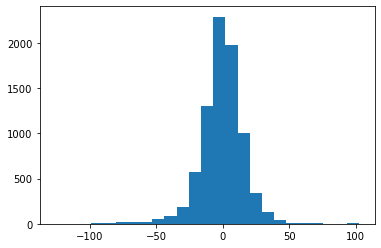

In [44]:
plt.hist(error_list, bins=25)